<a href="https://colab.research.google.com/github/Git-Hub-Pro/ML_STUDY_BY_KAGGLE/blob/master/Titanic_tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [0]:
df_train = pd.read_csv("/content/gdrive/My Drive/data/kaggle_data/train.csv")
df_test  = pd.read_csv("/content/gdrive/My Drive/data/kaggle_data/test.csv")

In [0]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [0]:
# Age에는 null data 가 177개나 있습니다. 이를 채울 수 있는 여러 아이디어가 있을 것인데, 여기서 우리느ㄴ title + statistics를 사용해 보겠습니다.
# 영어에는 Miss , Mrr, Mrs 같은 title이 들어가게 되는데 이를 사용해 보겠습니다.
# pandas series 에는 data 를 string 으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method 가 있습니다.
# 거기에 정규표현식을 적용하게 해주는 extract method 가 있습니다. 이를 사용하여 title을 쉽게 추출할 수 있습니다. title 을 Initial column에 저장하겠습니다.

In [0]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [0]:
# pandas 의 crosstab 을 이용하여 우리가 추출한 Initial 과 Sex간의 count를 살펴봅시다.

In [7]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')
# cheking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [0]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [9]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


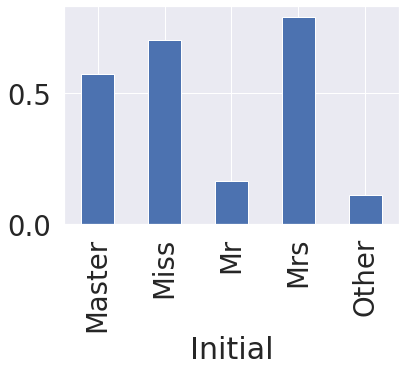

In [10]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [0]:
# null data를 채우느ㄴ 방법은 정말 많이 존재합니다. statistics를 활용하는 방법도 있고, null data가 없는 데이터르ㄹ 기반으로 새로운
# 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다. 여기서는 statistics를 활용하는 방법을 사용할 것입니다.
# 여기서 statistics는 train data의 것을 의미합니다. 우리는 언제나 test를 unseen 으로 둔 상태로 놔둬야 하며, train에서 얻은 statistics를 기반으로
# test의 null data를 채워줘야 합니다.

In [12]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [0]:
# Age의 평균을 이용해 Null value를 채우도록 하겠습니다..

In [0]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [15]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')


Embarked has  2  Null values


In [0]:
df_train['Embarked'].fillna('S', inplace=True)

In [17]:
"""
Age 는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만,
Age 를 몇개의 group 으로 나누어 category 화 시켜줄 수 도 있습니다. 
continuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있습니다만,
본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.
"""

'\nAge 는 현재 continuous feature 입니다. 이대로 써도 모델을 세울 수 있지만,\nAge 를 몇개의 group 으로 나누어 category 화 시켜줄 수 도 있습니다. \ncontinuous 를 categorical 로 바꾸면 자칫 information loss 가 생길 수도 있습니다만,\n본 튜토리얼에서는 다양한 방법을 소개하는 것이 목적이므로 진행하도록 하겠습니다.\n'

In [0]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [0]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [20]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [0]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


In [23]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,2.057860,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,2.270836,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,2.159003,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,2.508582,NaN,S,3,Mrs,2


In [24]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [27]:
df_train['Embarked'].isnull().any()

False

In [0]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})
del heatmap_data

In [0]:
# one-hot encoding on Initial and Embarked

In [0]:
df_train = pd.get_dummies(df_train,columns=['Initial'],prefix='Initial')
df_test = pd.get_dummies(df_test,columns=['Initial'],prefix='Initial')

In [32]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,S,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,C,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,S,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,S,1,3,0,0,1,0,0


In [0]:
df_train = pd.get_dummies(df_train,columns=['Embarked'],prefix='Embarked')
df_test = pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

In [0]:
# sklearn로 Labelencoder + oneHotencoder 이용해도 one-hot encoding이 가능합니다.
# category 가 100개가 넘어가는 경우가 있습니다. 이때 One-hot encoding 을 사용하면 column이 100개가 생겨, 학습시 매우 버거울 경우가
# 있습니다. 이런 경우는 다른 방법을 사용하기도 합니다.

In [0]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [36]:


df_train.head()



,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [37]:


df_test.head()



,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_Master,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other,Embarked_C,Embarked_Q,Embarked_S
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


In [0]:
# Building machine learning model and prediction using the trained model
"""
RandomForestClassifier는 여러개의 Sampling data를 동일한 방법(결정 트리)으로 training을 한 후, 각 각에 대해 예측한 결과 값을 토대로
결과값을 예측하는데 사용되고 있다.  

앙상블의 학습의 유형은 보팅(voting), 배깅(Bagging),부스팅(Boosting) 3가지 유형이 있다.
보팅은 모든 data set을 Linear Regression, K Nearest Neighbor, Support Vector Machine을 통한 예측값을 통하여 결과값을 예측하는데 사용된다.

부스팅은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에서도
가중치(weight)를 부여하면서 학습과 예측을 진행하는 것입니다. 
"""
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.
from sklearn.metrics import accuracy_score


In [0]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [40]:
"""
train을 하고 valid를 거쳐, test를 진행하는 것.
파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요합니다. 결국 많이 써봐야 모델도 잘 세울 수 있는 것이죠.
그래서 캐글을 추천합니다. 여러 데이터 셋을 가지고 모델을 이리저리 써봐야 튜닝하는 감이 생길테니까요!
"""

'\ntrain을 하고 valid를 거쳐, test를 진행하는 것.\n파라미터 튜닝은 시간, 경험, 알고리즘에 대한 이해 등이 필요합니다. 결국 많이 써봐야 모델도 잘 세울 수 있는 것이죠.\n그래서 캐글을 추천합니다. 여러 데이터 셋을 가지고 모델을 이리저리 써봐야 튜닝하는 감이 생길테니까요!\n'

In [0]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)
# test size 비율 30%,random_state=2018

In [0]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [43]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 81.34% 정확도로 생존을 맞춤


In [46]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_tr,y_tr)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.8041


In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_tr,y_tr)
pred = vo_clf.predict(X_vld)
print('Voting 분류기 정확도 ::{0:.4f}'.format(accuracy_score(y_vld,pred)))

Voting 분류기 정확도 ::0.8769
LogisticRegression 정확도:0.8731
KNeighborsClassifier 정확도:0.8507


In [62]:
# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf,knn_clf]
for classifier in classifiers:
  classifier.fit(X_tr,y_tr)
  pred = classifier.predict(X_vld)
  class_name = classifier.__class__.__name__
  print('{0} 정확도:{1:.4f}'.format(class_name,accuracy_score(y_vld,pred)))

LogisticRegression 정확도:0.8731
KNeighborsClassifier 정확도:0.8507


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)
# test size 비율 30%,random_state=2018
# GBM 수행시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_tr,y_tr)
gb_pred = gb_clf.predict(X_vld)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행시간:{0:.1f} 초'.format(time.time()-start_time))

GBM 정확도:0.8507
GBM 수행시간:0.1 초


In [65]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf,param_grid=params,cv=2,verbose=1)
grid_cv.fit(X_tr,y_tr)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도:0.7961


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.9s finished


In [67]:
import xgboost
print(xgboost.__version__)

0.90


In [68]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
evals = [(X_tr,y_tr)]

xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True)
prediction = xgb_wrapper.predict(X_vld)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

[0]	validation_0-logloss:0.647793
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.610131
[2]	validation_0-logloss:0.579058
[3]	validation_0-logloss:0.553024
[4]	validation_0-logloss:0.530663
[5]	validation_0-logloss:0.511984
[6]	validation_0-logloss:0.495941
[7]	validation_0-logloss:0.481871
[8]	validation_0-logloss:0.469568
[9]	validation_0-logloss:0.459344
[10]	validation_0-logloss:0.4502
[11]	validation_0-logloss:0.442534
[12]	validation_0-logloss:0.435537
[13]	validation_0-logloss:0.429437
[14]	validation_0-logloss:0.424127
[15]	validation_0-logloss:0.419061
[16]	validation_0-logloss:0.414802
[17]	validation_0-logloss:0.411007
[18]	validation_0-logloss:0.407388
[19]	validation_0-logloss:0.404237
[20]	validation_0-logloss:0.401303
[21]	validation_0-logloss:0.397967
[22]	validation_0-logloss:0.395085
[23]	validation_0-logloss:0.392295
[24]	validation_0-logloss:0.389857
[25]	validation_0-logloss:0.387315
[26]	validation_0-logloss:0.38563